# Histograms

Um histograma é um gráfico de barras que mostra a frequência de um determinado fenômeno.

Um ótimo exemplo são as distribuições de probabilidade. Por exemplo, no primeiro curso desta especialização, abordamos a diferença entre as distribuições aleatória, uniforme, normal e qui-quadrado.

As funções de probabilidade podem ser visualizadas como uma curva, em que o eixo y contém a probabilidade de um determinado valor ocorrer e o eixo x é o próprio valor. Isso é chamado de função de densidade de probabilidade. Os valores do eixo y são limitados entre zero e um, onde zero significa que não há chance de um determinado valor ocorrer e um significa que o valor sempre ocorrerá.

Os valores do eixo x são rotulados em termos da função de distribuição. No caso da distribuição normal, isso geralmente ocorre em termos de desvios padrão.

Portanto, um histograma é apenas um gráfico de barras em que o eixo x é uma determinada observação e o eixo y é a frequência com que essa observação ocorre. Portanto, devemos ser capazes de plotar uma determinada distribuição de probabilidade por amostragem dela.

Agora, lembre-se de que amostragem significa que apenas escolhemos um número da distribuição, como jogar um dado ou retirar uma única carta de um baralho. Ao fazermos isso repetidas vezes, obtemos uma descrição mais precisa da distribuição. Vamos parar de falar sobre isso e fazer um pouco de codificação para vê-lo em ação.

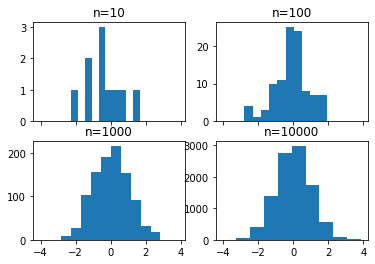

In [1]:
# I'm going to bring in matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np

# Let's pull some samples from the normal distribution and plot four different histograms as subplots. First I'll 
# create our 2 x 2 grid of axis objects. In this case, we don't want to share the y-axis between the plots since 
# we're intentionally looking at a number of different sizes of samples.
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

# We're mostly interested in how uniform the distribution looks. Then we can iterate through a list of four 
# different values, 10, 100, 1,000 and 10,000. And we'll pull samples from the NumPy. Remember that the normal 
# function of random just creates a list of numbers based on the underlying normal distribution.

# So iterate through each axis
for n in range(0,len(axs)):
    # pull out a number of samples, getting exponentially bigger
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    # and plot that sample
    axs[n].hist(sample)
    # setting a useful, of course!
    axs[n].set_title(f'n={sample_size}')

Bem, lá vamos nós. O primeiro gráfico tem apenas dez amostras, então parece bastante irregular. E na minha versão aqui, acho que ninguém diria que isso é obviamente uma distribuição normal. Quando saltamos para 100 amostras, fica melhor, mas ainda bastante irregular. Então parece suavizar um pouco os gráficos para 1.000 e 10.000 amostras.

Mas se olharmos de perto, podemos ver que a barra dos 10.000 gráficos é realmente mais larga do que os 10 ou 100 gráficos. O que está acontecendo aqui?

Por padrão, o histograma no Matplotlib usa dez caixas, ou seja, dez barras diferentes. Aqui criamos um eixo x compartilhado e, à medida que extraímos mais amostras da distribuição, é mais provável que obtenhamos valores discrepantes mais distantes de nossa média. Assim, dez compartimentos para n=10 são, na melhor das hipóteses, capturando dez valores únicos, enquanto para n=10.000, muitos valores devem ser combinados em um único compartimento. Vamos fazer a mesma função com o bin definido como 100

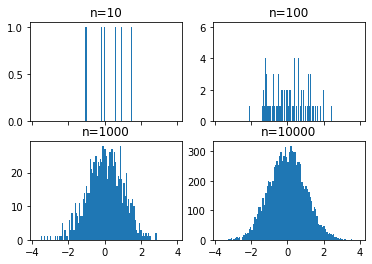

In [2]:
# repeat with number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    # pull out a number of samples, getting exponentially bigger
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    # and plot that sample
    axs[n].hist(sample, bins=100)
    # setting a useful, of course!
    axs[n].set_title(f'n={sample_size}')

Agora vemos que o gráfico de 10.000 amostras parece muito mais suave do que todos os outros. E o gráfico de 10 amostras mostra que cada amostra está basicamente em sua própria caixa.

Então, acho que isso levanta uma questão importante de quantos compartimentos você deve plotar ao usar um histograma. Receio que a resposta não seja muito clara. Ambos os gráficos são verdadeiros, um é um visual dos dados em granularidade grosseira e o outro em granularidade mais fina. Quando olhamos para a granularidade mais fina em nossos dados, plotando com 10.000 compartimentos, os histogramas se tornaram basicamente inúteis para a tomada de decisões. Uma vez que eles não estão mostrando tendências entre as amostras tanto quanto estão mostrando apenas o tamanho da amostra. Isso é semelhante ao uso de estatísticas agregadas como a média no desvio padrão para descrever uma amostra de uma população. Esses valores são grosseiros e se eles são apropriados depende muito de suas perguntas e interesses.

Quero usar nosso novo conhecimento de histogramas e subtramas para apresentar a você um layout GridSpec mais flexível para subtramas. O GridSpec permite mapear eixos em várias células em uma grade.

Por exemplo, vamos criar um gráfico de dispersão em que os valores y vêm da distribuição normal e os valores x vêm de uma distribuição aleatória.

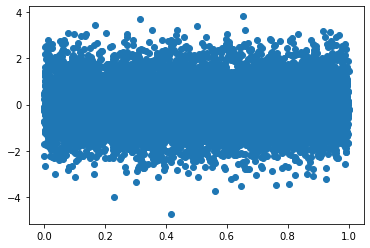

In [3]:
# Just a bunch of random data being created here
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X,Y);

Olhando para este gráfico não está totalmente claro quais são as distribuições reais para cada eixo, mas podemos adicionar dois gráficos menores, cada um histograma, para tornar isso um pouco mais claro. Vamos mergulhar direto - vou definir uma grade 3x3, nove células no total. Quero que o primeiro histograma ocupe o espaço superior direito e o segundo histograma ocupe os dois espaços inferiores à esquerda, girados de lado. O gráfico de dispersão original pode ocupar um quadrado dois por dois no canto inferior direito.

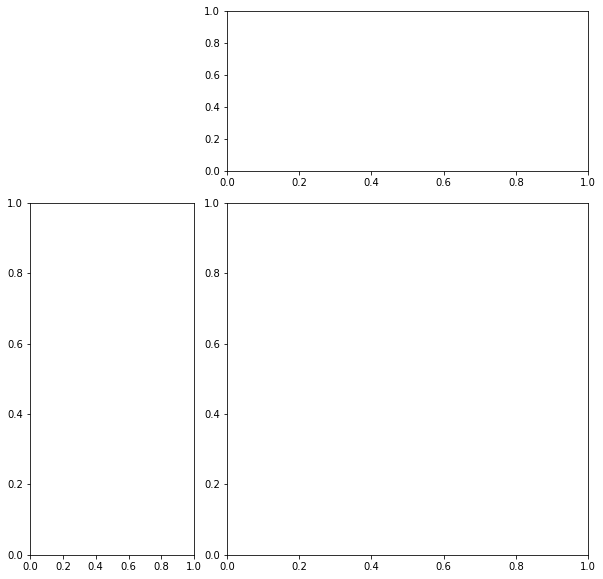

In [4]:
# To use the GridSpec, we first import it, then create a new GridSpec of the overall shape that we want.
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec
plt.figure(figsize=(10,10))
gspec = gridspec.GridSpec(3, 3)

# When we add new items with the subplot, instead of specifying the three numbers of row, column and position, 
# we pass in the elements of the GridSpec object which we wish to cover. And very important here. Because 
# we are using the elements of a list, all of the indexing starts at zero, and is very reasonable to use 
# slicing for the beginning or ends of lists.

# The GridSpec is indexed as rows and columns using the indexing operator, or square brackets. So we'll 
# create the first subplot and histogram in row 0, covering off the first element, the middle position, 
# and going to the end of the row.
top_histogram = plt.subplot(gspec[0, 1:])

# We'll create the side_histogram starting in row 1, and continuing to the end of row elements, but limited to 
# the 0 column.
side_histogram = plt.subplot(gspec[1:, 0])

# Finally we'll create the scatter plot in the lower_right. When we execute this, we see our basic set of 
# plots, great.
lower_right = plt.subplot(gspec[1:, 1:])

Agora, vamos preencher isso com alguns dados. Primeiro o gráfico de dispersão, depois o histograma superior, que é para os valores de x, depois o histograma lateral para os valores de y.

E queremos que o histograma lateral fique alinhado, então vamos girar o layout definindo a orientação. Na verdade, existem algumas maneiras de fazer isso, mas como é tão comum, o Matplotlib tem um parâmetro de orientação que podemos definir como horizontal.

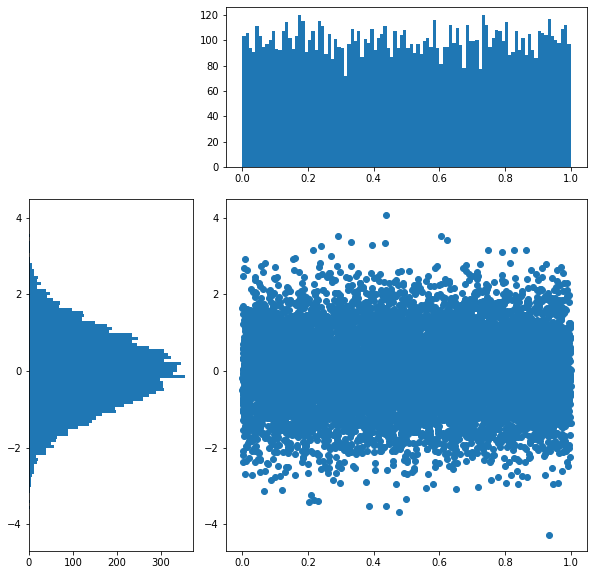

In [5]:
# Our fake data
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)

# Our figure and gridspec
plt.figure(figsize=(10,10))
gspec = gridspec.GridSpec(3, 3)

# Our three subplots all spec'ed out
top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

# And now our data plotted in each subplot
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
side_histogram.hist(Y, bins=100, orientation='horizontal');

Fica imediatamente claro que temos duas distribuições diferentes! Agora realmente não nos importamos com o valor dos eixos y para o histograma superior ou o valor dos eixos x para o histograma inferior. Uma vez que estes são histogramas de densidade de probabilidade, nos preocupamos apenas com os valores relativos, e no matplotlib podemos fazer isso indicando que nossos histogramas são `density=True`. Também podemos inverter a subtrama do eixo x para o histograma no lado esquerdo, o que torna (talvez) mais claro que ele representa os dados no lado direito. Fazemos isso diretamente usando a função `invert_xaxis` no eixo. Finalmente, podemos ver que nossos eixos têm um pouco de preenchimento de espaço em branco à esquerda e à direita, o que parece desnecessário. Portanto, podemos nos livrar disso alterando os limites de nossos eixos.

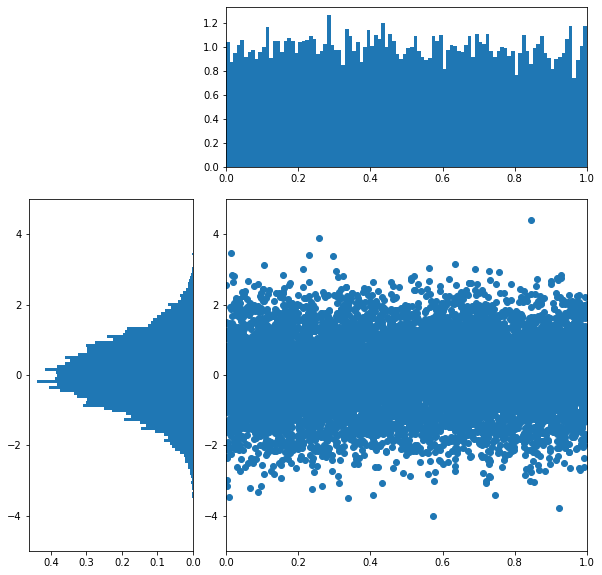

In [6]:
# Our fake data
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)

# Our figure and gridspec
plt.figure(figsize=(10,10))
gspec = gridspec.GridSpec(3, 3)

# Our three subplots all spec'ed out
top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

# And now our data plotted in each subplot, making it clear this is a density function
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100,  density=True)
side_histogram.hist(Y, bins=100, orientation='horizontal',  density=True);

# Flip the side histogram's x axis
side_histogram.invert_xaxis()

# change axes limits to get rid of whitespace
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

E lá vamos nós. Podemos ver que nosso histograma superior é aleatório, bastante uniforme, e que o histograma para os valores de y realmente se parece com a distribuição normal.

Na verdade, essa imagem se parece um pouco com a imagem que vimos no primeiro módulo deste curso, do estudo do MIT e de Harvard sobre engajamento MOOC. E deve estar bem claro para você agora como podemos ajustar vários aspectos desse enredo para que, se quisermos parecer ainda mais com a imagem do noivado, possamos. Na verdade, por que você não tenta? Você acha que poderia adicionar títulos a essas subtramas, semelhantes ao da publicação do MIT e de Harvard? Ou alterar os tamanhos de pontos individuais porque estamos lidando com big data? E quanto ao estilo, você poderia mudar as cores das tramas para imitar as do MIT e Harvard? Experimente suas novas habilidades de matplotlib encontradas.

![MOOC DATA](assets/moocdata.png "Image")